In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import.

For this progect I chose the dataset of transactions made by credit cards (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). The goal of the ML model well be to detect frauds. Dealing with this dataset was a bit challenging and therefore interesting.

Lets start for importing the data.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#data_init = pd.read_csv('/content/drive/MyDrive/ML/MyProject/creditcard.csv')

# the file is too big to be simply uploaded to github, had to use git LFS, the file in the repository is actually a pointer: open the file -> "View raw" -> copy the link
data_init = pd.read_csv('https://media.githubusercontent.com/media/glromane/MLBas_Romanenko_exam/refs/heads/main/creditcard.csv')
data_init

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# First look at the description and features, rescailing and fake removal.

Looks like V1-28 features are already scaled but 'Time' and 'Amount' -- not. Le't call for description.

In [8]:
description = data_init.describe()
description

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Yes, features 'V1-28' are more or less scaled (mean = 0; std = order of 1). So, we leave them as they are.

Now let's check first and 'Amount' and 'Class'. We see that the latest (a binary feature) has a very low mean which suggests that the dataset is highly inbalanced. The feature 'Amount' has entries with 0 (from the description we see that the min = 0) which must be fake since there coud be no transfers with 0 amount. Let's check it.

In [9]:
data_init[data_init['Amount'] == 0].shape[0]

1825

We have 1825 fake entries, we need to get rid of. From now on we will use only entries for which the amount is > 0.

In [10]:
data = data_init[data_init['Amount'] > 0]
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Speaking of the time, we know from the dataset description that the time was measured in seconds for 2 days of datataking. To make this feature more "invariant" let's transform it to just dayly time in hours:

In [11]:
new_time1 = data[data['Time'] <= 86400]['Time'].values
new_time2 = data[data['Time'] > 86400]['Time'].values - 86400

new_time = np.array(new_time1.tolist() + new_time2.tolist())

#data = pd.DataFrame(data_init)
data.loc[:, 'Time'] = new_time/3600

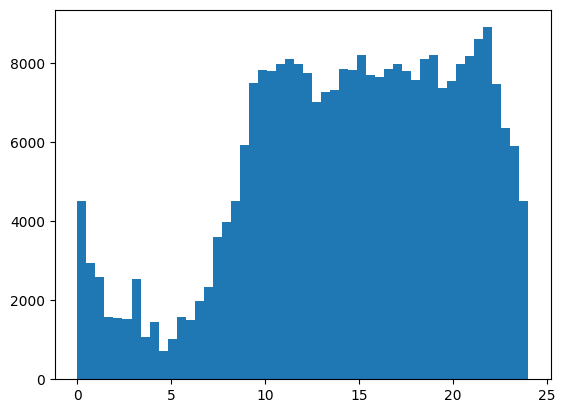

In [12]:
plt.hist(data['Time'].values, 50)
plt.show()

OK, now let's take a look at the 'Amount' feature distirbution:

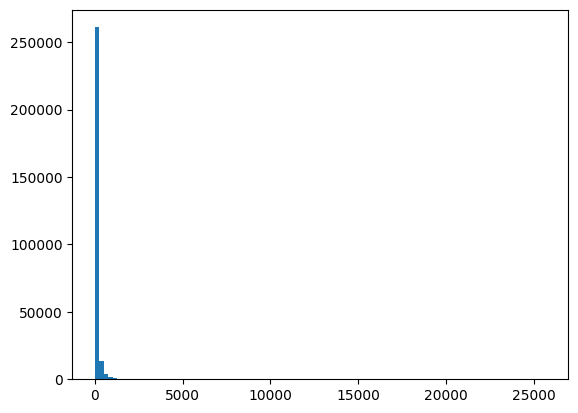

In [13]:
plt.hist(data['Amount'].values, 100)
plt.show()

It semmes to be very skewed. We need to somehow transform it to look less skewed but we also wan this transformation to be "invariant" (i.e. to not to depend on the distribution itself for the sake of robustness of the final model). Noticing that it looks a bit exponential (judging by eye), we will use the log function for this feature. In that case our transformation will not depend on the input data, so if the model is to be used on an unknown future data with an (in general) unknown distribution, it stays robust.

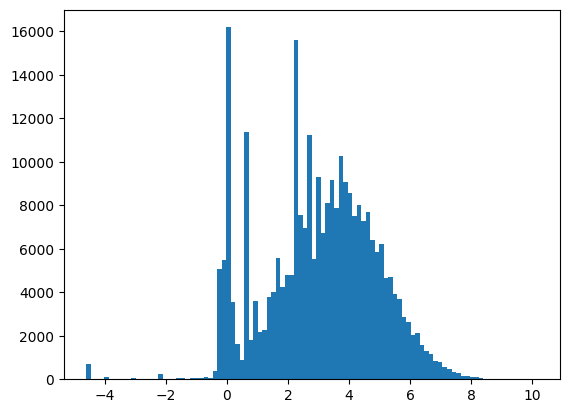

In [14]:
data.loc[:, 'Amount'] = np.log(data['Amount'].values)
plt.hist(data['Amount'].values, 100)
plt.show()

Now, speaking of imbalance let's check the level of it.

In [15]:
N_all = data.shape[0] # all entries
N_frauds = data[data['Class']==1].shape[0] # fraud cases
N_non_frauds = N_all - N_frauds

print("Number of non-frauds = %i (%.2f %%)" % (N_non_frauds, 100*N_non_frauds/N_all))
print("Number of frauds = %i (%.2f %%)" % (N_frauds, 100*N_frauds/N_all))

Number of non-frauds = 282517 (99.84 %)
Number of frauds = 465 (0.16 %)


Wow, it's very imbalanced. Let's take a look now on correlations.

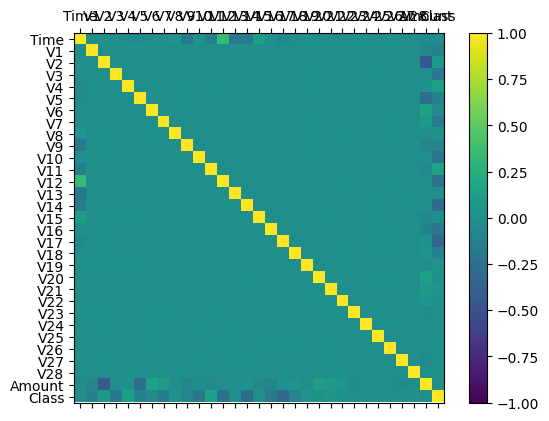

In [16]:
# plot correlation matrix
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(np.array(data.columns))
ax.set_yticklabels(np.array(data.columns))
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Well, I wouldn't say it's very indicative. Later we will try to see the importance of different featureas using other methods.

#Outliers removal.

Now using boxplots we will try to remove the outliers.

Note: the "cuts" on outliers are chosen the way to remove clear and most severe outliers but they're not very tight, since we want to keep as many fraud entries as possible because we already have too few of them. We will also go only with features "V1-V28" So, it might not be perfect of course.

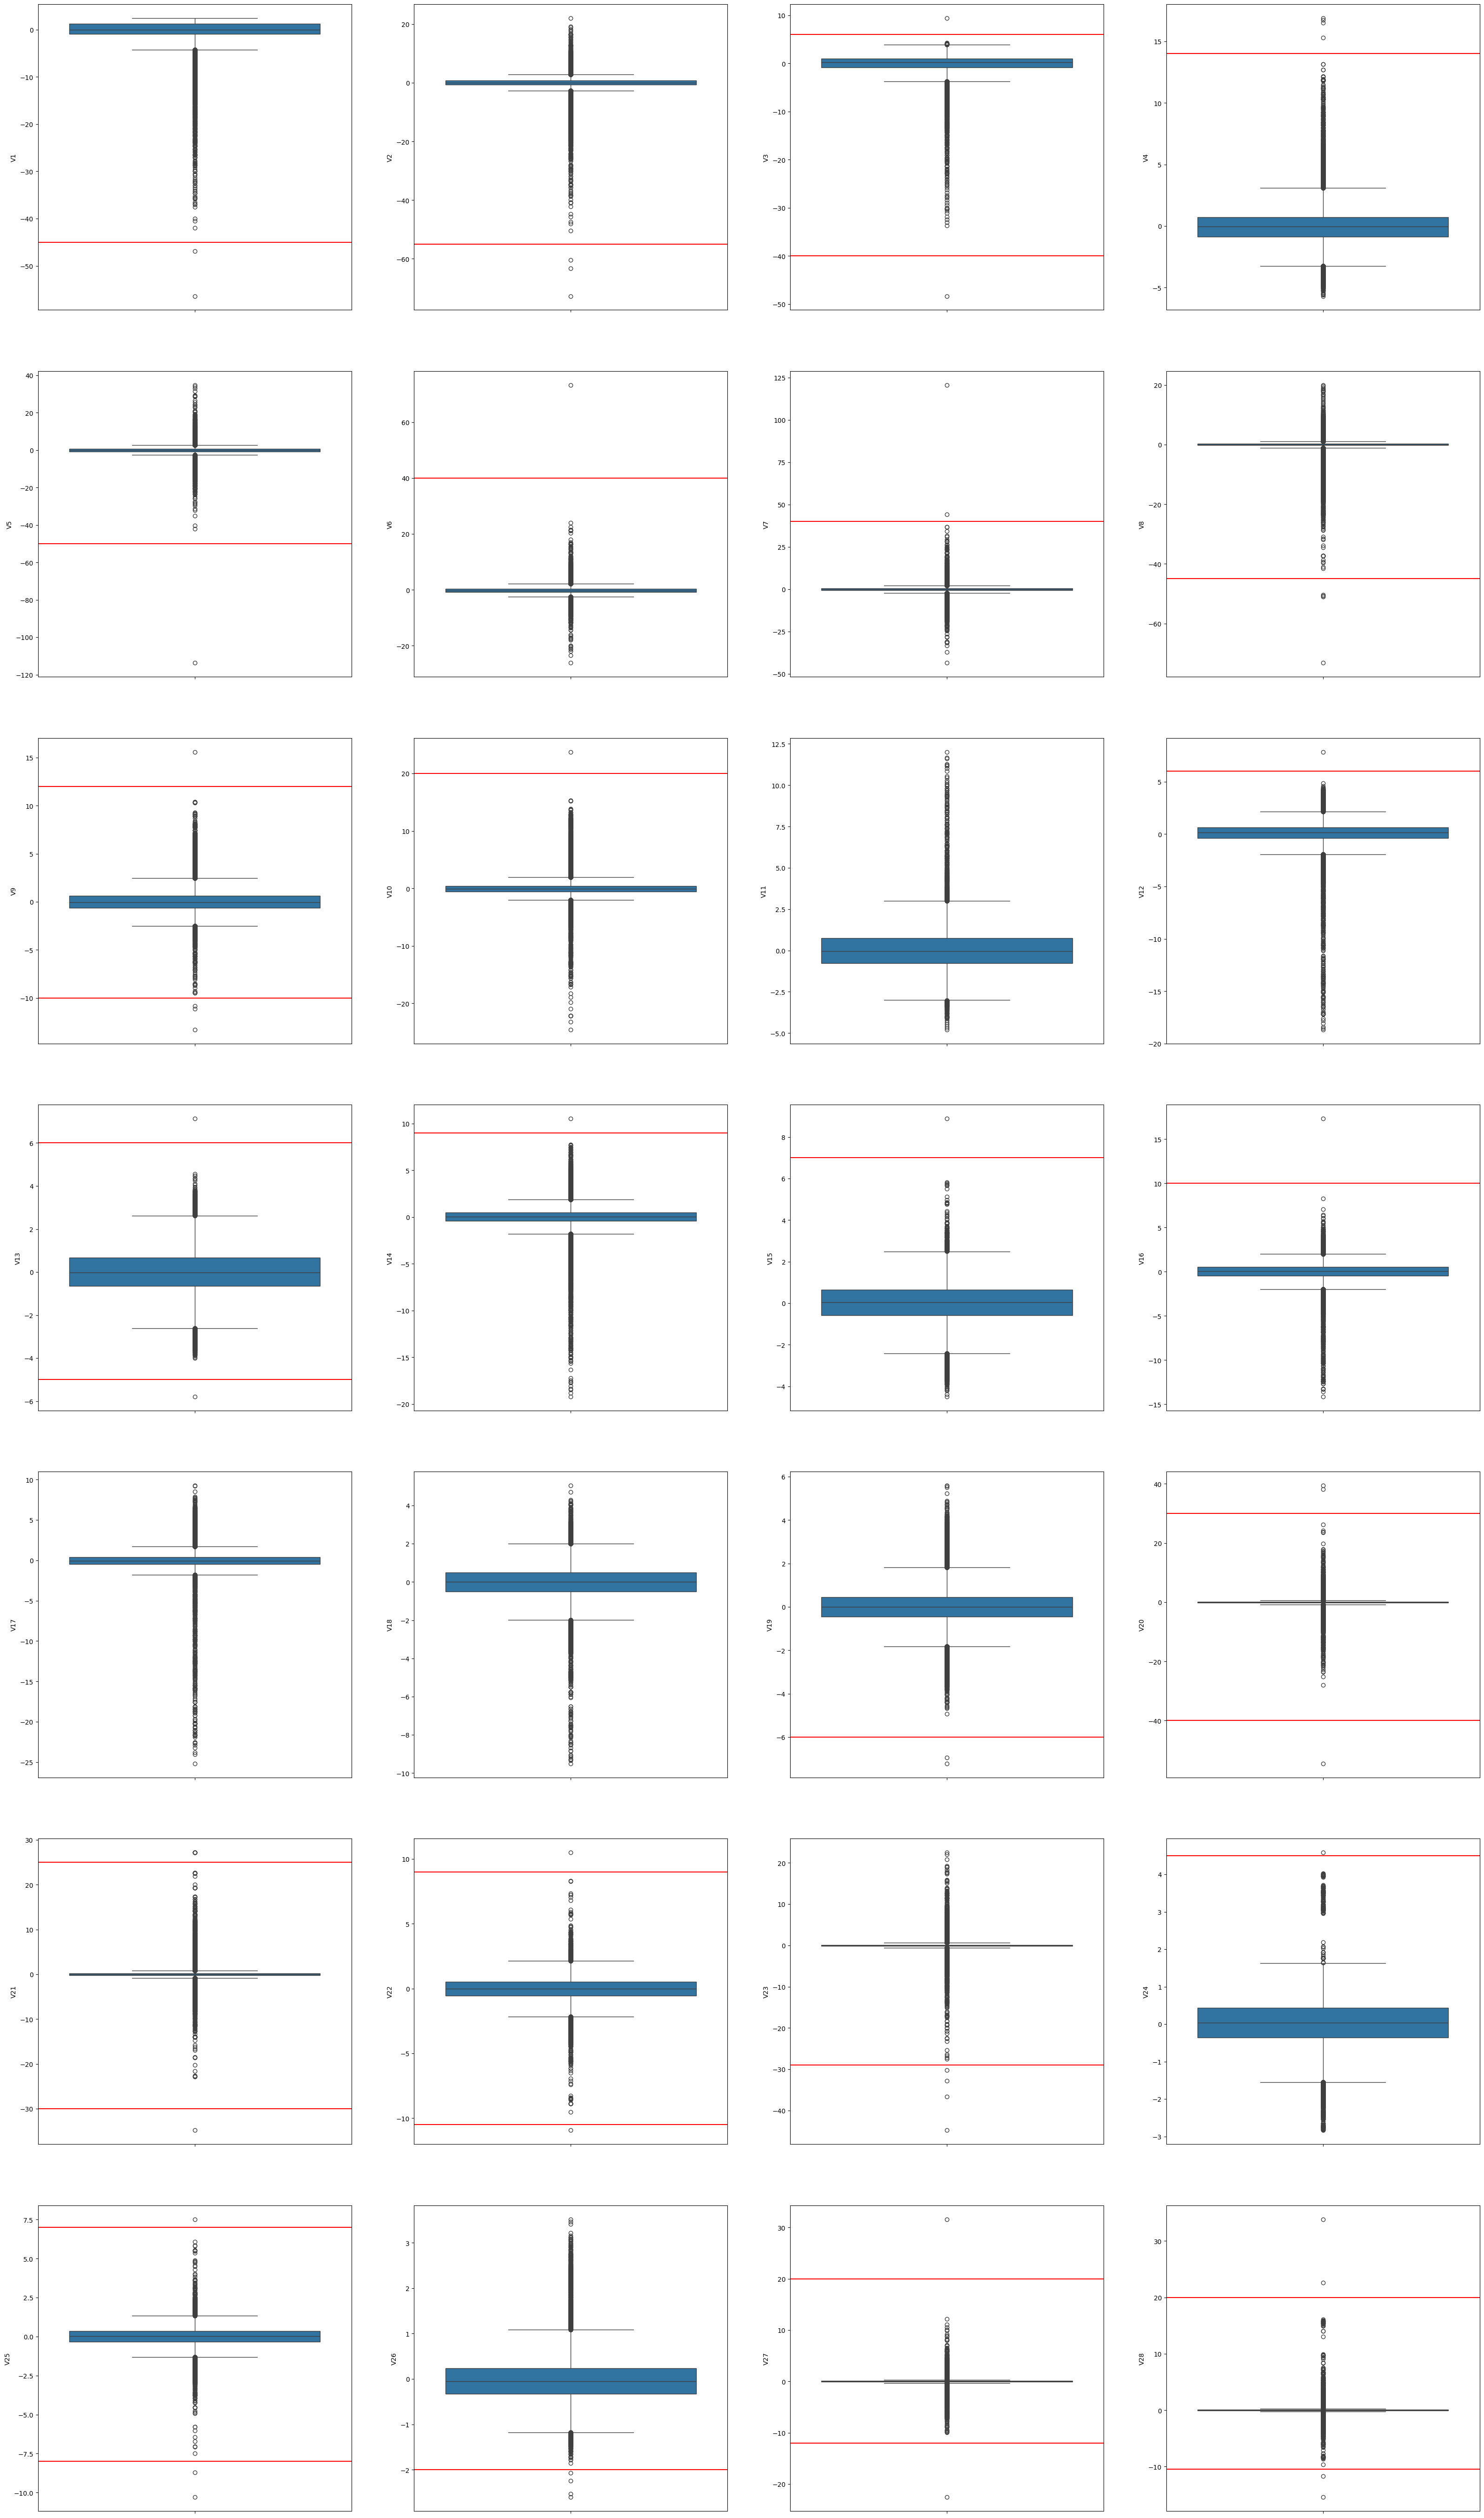

In [17]:
fig, axs = plt.subplots(7, 4, figsize=(40, 70))

count=0
labels = np.array(data.columns.values[1:29])

# the limits are choosen after looking at the plots and set aposteriori to visualise the choice of our cuts without replotting
low_limit = [-45, -55, -40, 0,
             -50, 0, 0, -45,
             -10, 0, 0, 0,
             -5, 0, 0, 0,
             0, 0, -6, -40,
             -30, -10.5, -29, 0,
             -8, -2, -12, -10.5]

# the limits are choosen after looking at the plots and set aposteriori to visualise the choice of our cuts without replotting
up_limit = [0, 0, 6, 14,
            0, 40, 40, 0,
            12, 20, 0, 6,
            6, 9, 7, 10,
            0, 0, 0, 30,
            25, 9, 0, 4.5,
            7, 0, 20, 20]

for i in range(7):
  for j in range(4):
    sns.boxplot(y=labels[count], data=data, ax=axs[i][j]);
    #axs[i][j].set_yticks(ticks)
    if low_limit[count]:
      axs[i][j].axhline(y = low_limit[count], color = 'r', linestyle = '-')
    if up_limit[count]:
      axs[i][j].axhline(y = up_limit[count], color = 'r', linestyle = '-')
    count+=1

plt.show()

In [18]:
to_remove = []
count = 0

for name in data.columns.values[1:29].tolist():
  #print(name)
  if up_limit[count]: to_remove += np.array(np.where(data[name] > up_limit[count]))[0].tolist()
  if low_limit[count]: to_remove += np.array(np.where(data[name] < low_limit[count]))[0].tolist()
  count+=1

data_to_remove = pd.DataFrame(data=data, index=np.unique(to_remove))

print(np.unique(to_remove).size, " elements are chosen to be removed.")
print(np.sum(data_to_remove['Class']==1), " elements of Class=1")
print(np.sum(data_to_remove['Class']==0), " elements of Class=0")

26  elements are chosen to be removed.
0  elements of Class=1
26  elements of Class=0


Before dropping the outliers let's take a look at the 'Amount' distribution:

<Axes: xlabel='Amount'>

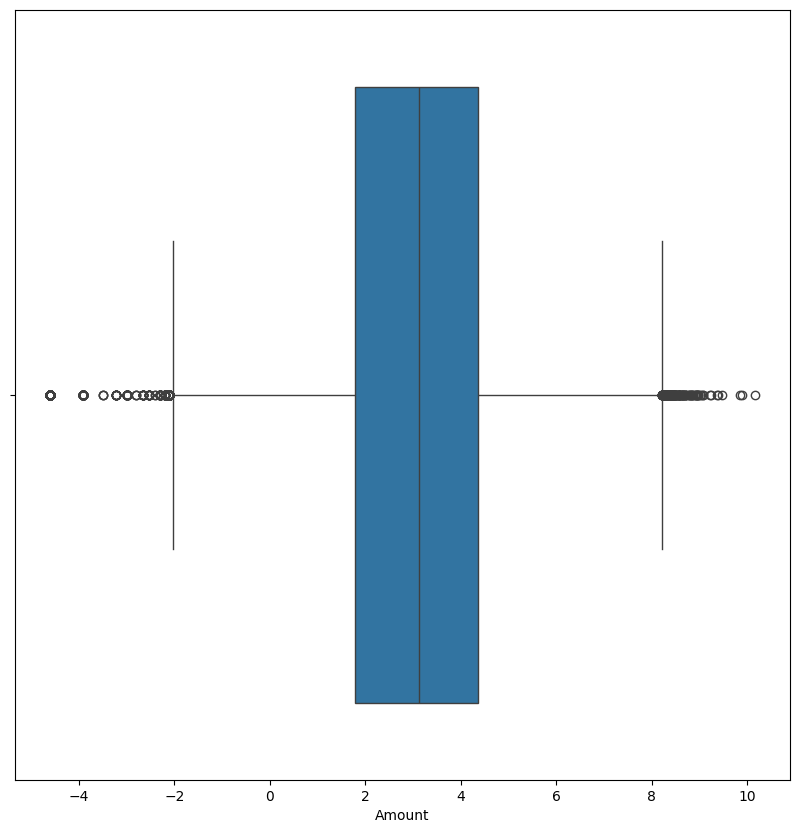

In [19]:
sns.boxplot(x=data['Amount'])

Looks more or less smooth. Not touching it. Now, drop the choosen entries and write the selected data to a separate file to be used later in the models training.

In [20]:
data = data.drop(index=np.unique(to_remove)).reset_index(drop=True)
#write
#data.to_csv('/content/drive/MyDrive/ML/MyProject/creditcard_selected.csv', index=False)

# Conclusion.

In this notebook we examined the data, cleaned them from fake labels and outliers. Selected subset was written in the separate file that will be used in the next notebook for maodel training where we will check different classification models, choose one of them and tweak it to get the desired performance.